In [1]:
import pandas as pd 
import xarray as xr
import numpy as np
import glob
import time
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units
import matplotlib.gridspec as gridspec

In [53]:
iss1= xr.open_dataset('ISS_20117000003a_W.nc')
iss2= xr.open_dataset('ISS_20118000004a_W.nc')
iss3= xr.open_dataset('ISS_20119000002a_W.nc')
iss = xr.concat([iss1,iss2,iss3],dim='Time')
wspd_WP = iss.WP_Speed.T.where(iss.WP_QC == 0)
wdir_WP = iss.WP_Direction.T.where(iss.WP_QC == 0)
temp_WP = iss.WP_Temperature.where(iss.WP_QC_Temperature == 0)
x_WP,y_WP = np.meshgrid(iss.Timestamp.data,iss.WP_Height[1].data)
WPwdir_rad = wdir_WP * (np.pi/180)
WP_u = np.array(-wspd_WP*np.sin(WPwdir_rad))
WP_v = np.array(-wspd_WP*np.cos(WPwdir_rad))

C:\Users\mattb\anaconda3\envs\research\lib\site-packages\xarray\coding\variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [24]:
allFiles = glob.glob("C:/Users/mattb/Documents/Research/wind_profiler_data/april2021/*")
print ('you have %s wind profiles to process' %(len(allFiles)))
dim1 = len(allFiles)
time_ar = np.zeros((dim1,1),dtype = 'datetime64[us]')
for i,k in enumerate(allFiles,0): #pull time from import dictionaries and append to list
    f = open(k,'r')
    f = f.readlines()
    t = f[4].strip()[:-7]
    time = pd.to_datetime(t, format = '%y %m %d %H %M')
    time_ar[i] = np.datetime64(time)
    df = pd.read_csv(k, skiprows = 10, sep = '\s+', na_values=999999,nrows = 42)
    height = df.HT.values
    if i ==0:
        spd_matrix = np.zeros((dim1,len(height)))
        dir_matrix = np.zeros((dim1,len(height)))
    spd_matrix[i] = df.SPD
    dir_matrix[i] = df.DIR

you have 48 wind profiles to process


In [55]:
height

array([0.193, 0.294, 0.395, 0.496, 0.598, 0.699, 0.8  , 0.902, 1.003,
       1.104, 1.206, 1.307, 1.408, 1.51 , 1.611, 1.712, 1.814, 1.915,
       2.016, 2.118, 2.219, 2.32 , 2.422, 2.523, 2.624, 2.726, 2.827,
       2.928, 3.03 , 3.131, 3.232, 3.334, 3.435, 3.536, 3.638, 3.739,
       3.84 , 3.941, 4.043, 4.144, 4.245, 4.347])

In [56]:
df

,HT,SPD,DIR,MET_QC,RAD,RAD.1,RAD.2,CNT,CNT.1,CNT.2,SNR,SNR.1,SNR.2,QC,QC.1,QC.2
0,0.193,2.6,175.0,0,0.2,-0.6,-0.2,18,18,18,11.0,11.0,3.0,0.0,0.0,0.0
1,0.294,1.5,203.0,0,0.2,-0.4,0.1,18,18,18,7.0,12.0,0.0,0.0,0.0,0.0
2,0.395,1.9,55.0,0,0.1,0.3,-0.3,18,18,14,-2.0,4.0,-9.0,0.0,0.0,0.0
3,0.496,1.7,18.0,2,0.1,0.4,-0.1,18,18,6,-8.0,1.0,-5.0,0.0,0.0,0.0
4,0.598,1.9,328.0,0,0.0,0.4,0.3,18,18,10,-6.0,-3.0,-7.0,0.0,0.0,0.0
5,0.699,1.8,333.0,0,0.1,0.4,0.3,18,18,16,-1.0,2.0,-8.0,0.0,0.0,0.0
6,0.800,1.8,3.0,0,0.1,0.5,0.1,18,18,18,0.0,9.0,-6.0,0.0,0.0,0.0
7,0.902,4.8,341.0,0,-0.2,1.1,0.6,18,18,18,5.0,15.0,-3.0,0.0,0.0,0.0
8,1.003,4.6,336.0,2,-0.2,1.0,0.7,17,17,17,9.0,16.0,-2.0,0.0,0.0,0.0
9,1.104,4.6,315.0,0,-0.2,0.7,1.0,17,17,17,8.0,12.0,-1.0,0.0,0.0,0.0


In [87]:
ds = xr.Dataset(coords = {'hgt':(['y'], height),'time':(['x'],pd.date_range('2021-04-20 00', periods = dim1, freq = '1H')) })
ds['wspd'] = (['time','hgt'], spd_matrix)
ds['wdir'] = (['time', 'hgt'], dir_matrix)
wdir_rad = ds.wdir * (np.pi/180)
u = -ds.wspd*np.sin(wdir_rad)
v = -ds.wspd*np.cos(wdir_rad)
x,y = np.meshgrid(ds.hgt,ds.time)
#ds.to_netcdf('sba_profiller.nc')

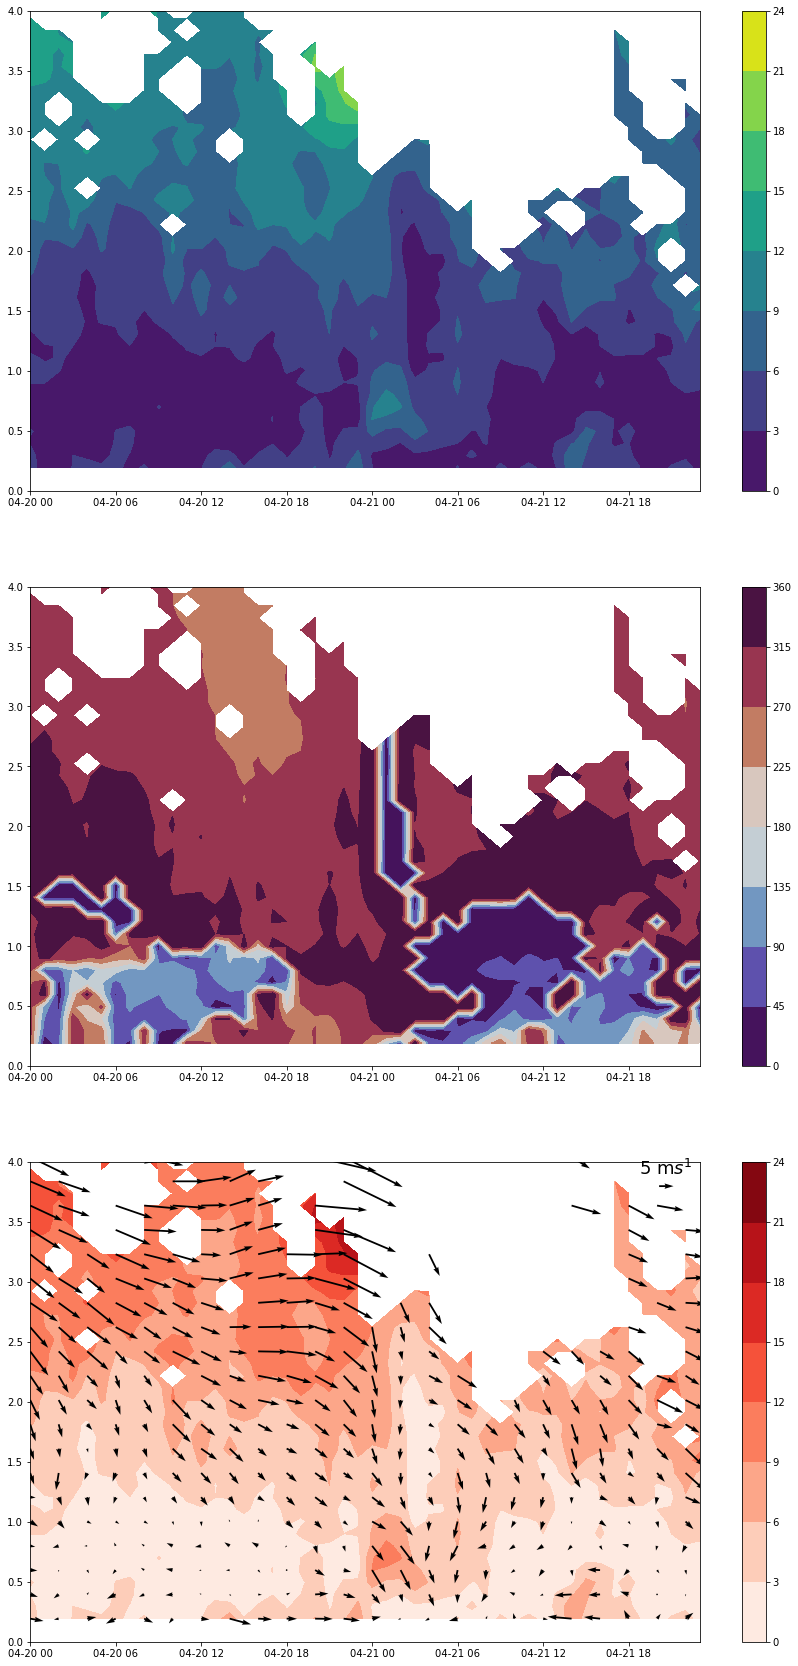

In [88]:
fig = plt.figure(figsize = (15,30))
gs = gridspec.GridSpec(ncols=1, nrows=3, figure=fig)
ax=fig.add_subplot(gs[0,0])
ax3=fig.add_subplot(gs[1,0])
ax5=fig.add_subplot(gs[2,0])

a = ax.contourf(y,x,ds.wspd, cmap = 'viridis')
ax.set_ylim(0,4)
plt.colorbar(a, ax=ax)

lvs = np.arange(0,405,45)
c = ax3.contourf(y,x,ds.wdir,levels=lvs, cmap = 'twilight_shifted')
ax3.set_ylim(0,4)
plt.colorbar(c, ax=ax3)


e = ax5.contourf(y,x, ds.wspd, cmap = 'Reds')
q = ax5.quiver(y[::2,::2],x[::2,::2], u[::2,::2], v[::2,::2], units = 'inches', scale = 25, width = 0.025 )
ax5.quiverkey(q, 0.95, .95, 5, '5 m$s^1$',coordinates ='axes', fontproperties={'size':18})
ax5.set_ylim(0,4)
plt.colorbar(e, ax=ax5)


<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
C:\Users\mattb\anaconda3\envs\research\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


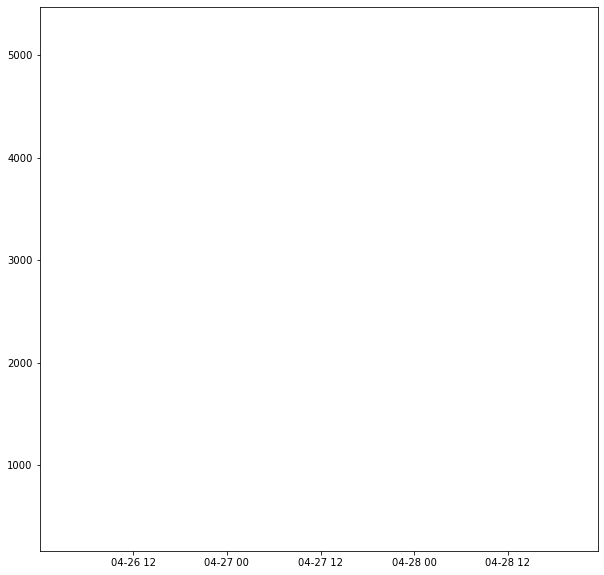

In [95]:
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111)
a = ax.pcolormesh(x_WP,y_WP, temp_WP.T, cmap = 'twilight_shifted')
#plt.colorbar(a)

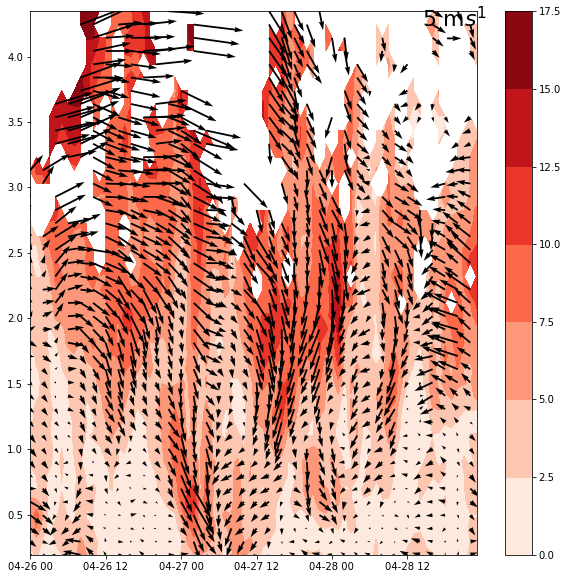

In [31]:
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111)
wdir_rad = ds.wdir * (np.pi/180)
u = -ds.wspd*np.sin(wdir_rad)
v = -ds.wspd*np.cos(wdir_rad)
#u,v = mpcalc.wind_components(ds.wspd.data*units('m/s'), ds.wdir.data*units('degrees'))
a = ax.contourf(y,x, ds.wspd, cmap = 'Reds')
q = ax.quiver(y[::2],x[::2], u[::2], v[::2], units = 'inches', scale = 25, width = 0.025 )
ax.quiverkey(q, 0.95, .95, 5, '5 m$s^1$',coordinates ='axes', fontproperties={'size':22})
plt.colorbar(a)

In [113]:
np.array(iss.Timestamp[2])-np.array(iss.Timestamp[1])
## 30 minute temporal resolution

numpy.timedelta64(1800000000000,'ns')

In [114]:
np.array(iss.HeightSpacing[1,0].data)

array(62.438957, dtype=float32)

In [79]:
iss.Mode

<xarray.DataArray 'Mode' (Mode: 3)>
array([0, 1, 2], dtype=int64)
Dimensions without coordinates: Mode